In [33]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import pickle
import warnings
import os
import sys
warnings.filterwarnings("ignore")

In [34]:
abs = os.getcwd()
abs = abs.replace("\\src\\Clustering\\Online_retail","")
#ab = ab + ("\\dataset\\")
abs

'c:\\Users\\abulf\\Documents\\Python_tutorial\\Assignments\\ML_framework'

In [35]:
abs = abs   + "\\utils"
sys.path.insert(0, abs)

In [36]:
from clustering import regress_plot
from clustering import box_plot
from clustering import print_score
from clustering import count_plot
from common import iqr
from common import process_check
from common import process_normal
from common import process_standard

In [37]:
abs = os.getcwd()
abs = abs.replace("\\src\\Clustering\\Online_retail","")
#ab = ab + ("\\dataset\\")
abs

'c:\\Users\\abulf\\Documents\\Python_tutorial\\Assignments\\ML_framework'

In [38]:
data = pd.read_csv(abs + "/dataset/Clustering//Online_retail/OnlineRetail.csv", encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [39]:
data.loc[data['CustomerID'] == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18-01-2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18-01-2011 10:17,1.04,12346.0,United Kingdom


In [40]:
data = data.dropna()
data.loc[data['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,05-12-2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,16-12-2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,21-12-2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,06-01-2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,06-01-2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,13-01-2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,10-02-2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,23-03-2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,30-03-2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,04-04-2011 14:42,0.0,14410.0,United Kingdom


In [41]:
data = data.drop(data[data['UnitPrice'] <= 0].index)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406789 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406789 non-null  object 
 1   StockCode    406789 non-null  object 
 2   Description  406789 non-null  object 
 3   Quantity     406789 non-null  int64  
 4   InvoiceDate  406789 non-null  object 
 5   UnitPrice    406789 non-null  float64
 6   CustomerID   406789 non-null  float64
 7   Country      406789 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [43]:
data['Quantity'] = data['Quantity'].abs()
data['amount']= data['Quantity']*data['UnitPrice']
data['amount'] = data['amount'].abs()

In [44]:
monetary_value = data.groupby(by='CustomerID')['amount'].sum()
monetary_value=monetary_value.reset_index()
monetary_value.head()

,CustomerID,amount
0,12346.0,154367.20
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [45]:
frequency= data.groupby(by='CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [46]:
grouped_df = pd.merge(frequency, monetary_value, how ='inner',on='CustomerID')
grouped_df.head()

,CustomerID,InvoiceNo,amount
0,12346.0,2,154367.20
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [47]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [48]:
max_date= data['InvoiceDate'].max()
data['diff']= max_date-data['InvoiceDate']
#data['diff'] = data['diff'].days
last_purchase = data.groupby(by='CustomerID')['diff'].min()
last_purchase=last_purchase.reset_index()
last_purchase['diff'] = last_purchase['diff'].apply(lambda x: x.days)
last_purchase.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [49]:
max_date

Timestamp('2011-12-09 12:50:00')

In [50]:
grouped_df = pd.merge(grouped_df, last_purchase, how='inner', on='CustomerID')
grouped_df.head()

,CustomerID,InvoiceNo,amount,diff
0,12346.0,2,154367.20,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


In [51]:
grouped_df.columns=['CustomerID','frequency','monetary_value','recency']
grouped_df.head()

,CustomerID,frequency,monetary_value,recency
0,12346.0,2,154367.20,325
1,12347.0,182,4310.00,1
2,12348.0,31,1797.24,74
3,12349.0,73,1757.55,18
4,12350.0,17,334.40,309


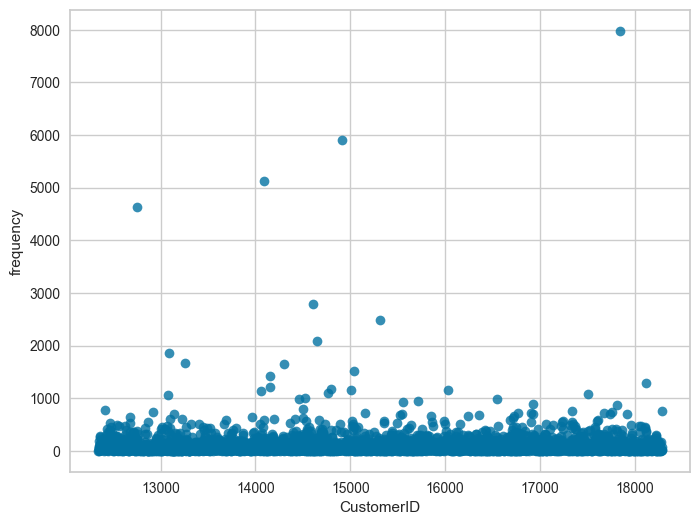

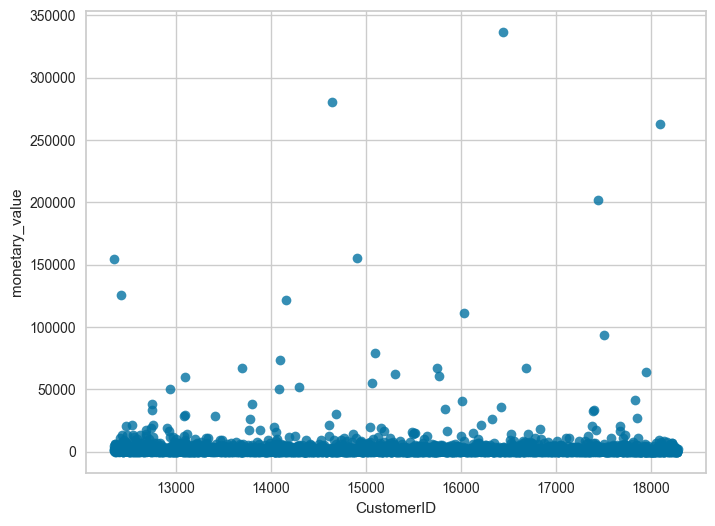

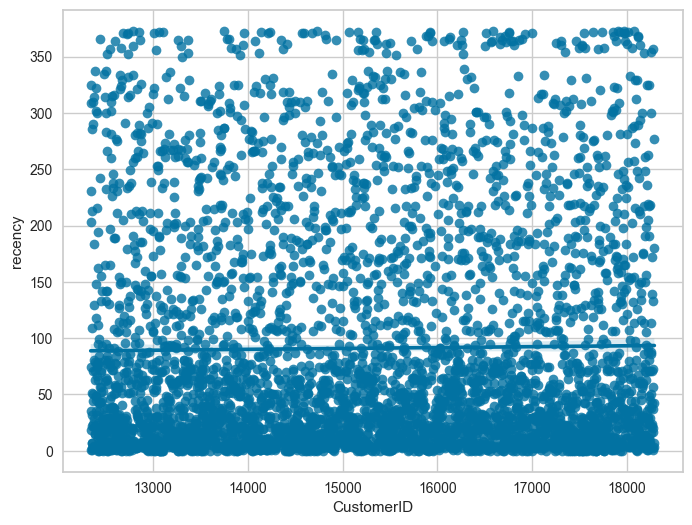

In [52]:
regress_plot(grouped_df, "frequency")
regress_plot(grouped_df, "monetary_value")
regress_plot(grouped_df, "recency")

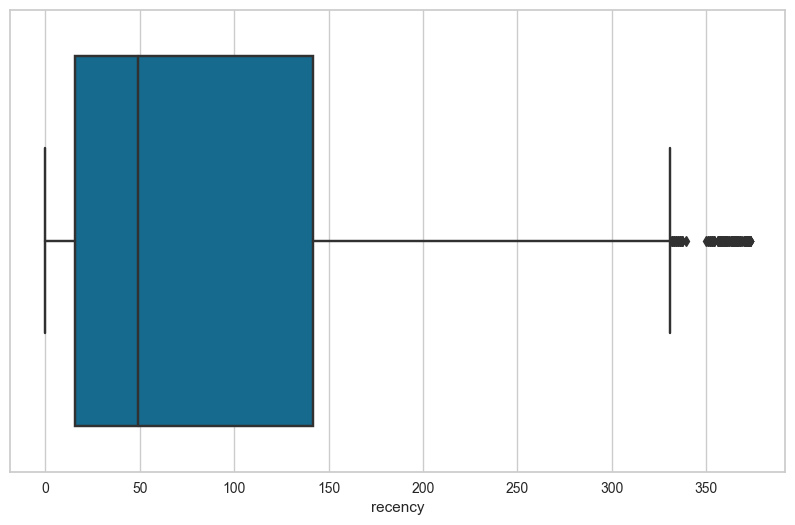

In [53]:
#box_plot(grouped_df, "frequency")
#box_plot(grouped_df, "monetary_value")
box_plot(grouped_df, "recency")

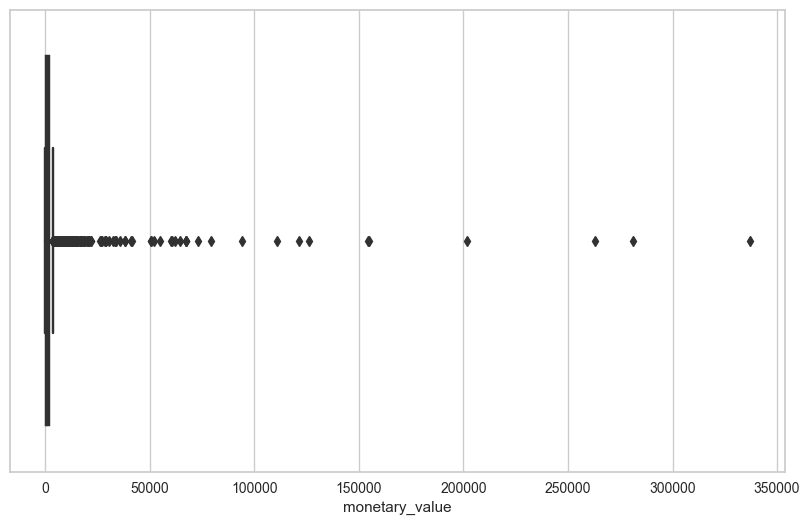

In [54]:
box_plot(grouped_df, "monetary_value")

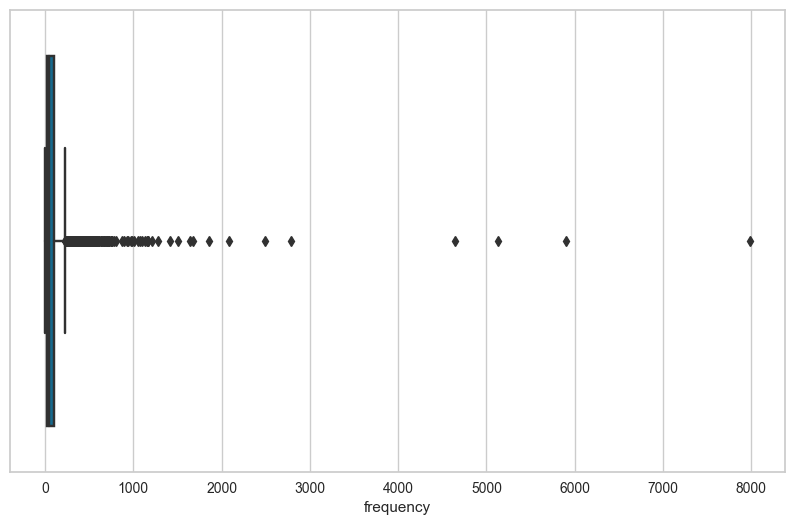

In [55]:
box_plot(grouped_df, "frequency")

In [56]:
grouped_df = iqr(grouped_df, "frequency")
grouped_df = iqr(grouped_df, "monetary_value")
grouped_df = iqr(grouped_df, "recency")

In [57]:
grouped_df.loc[grouped_df['CustomerID'] == 12346.0]

,CustomerID,frequency,monetary_value,recency


In [58]:
rfm_df = grouped_df[['monetary_value', 'frequency', 'recency']]

In [59]:
sca, norm = process_check(rfm_df)

In [60]:
print(sca)
print(norm)

[]
['monetary_value', 'frequency', 'recency']


In [61]:
rfm_df_scaled, normal_model = process_normal(rfm_df, norm)

In [62]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,0.312999,0.239418,0.002681
1,0.130465,0.039683,0.198391
2,0.127582,0.095238,0.048257
3,0.024201,0.021164,0.828418
4,0.251737,0.124339,0.093834


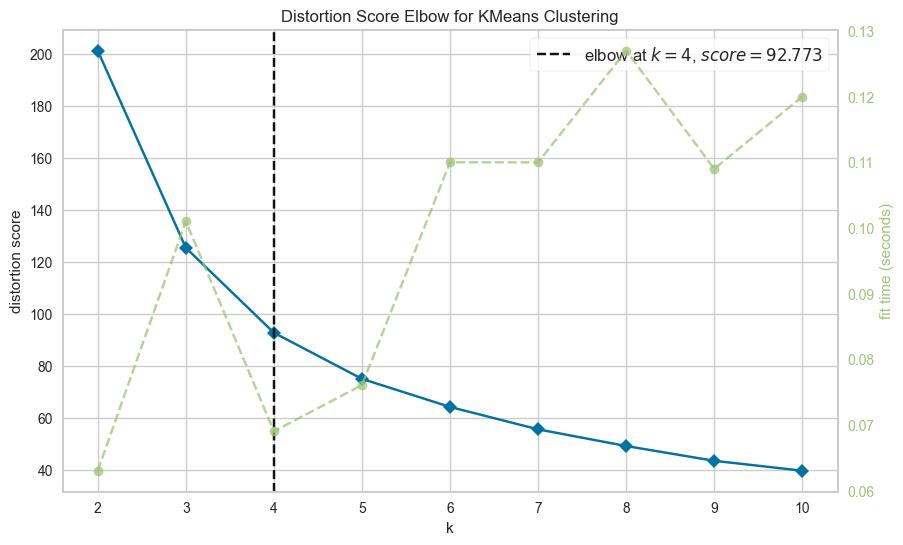

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(rfm_df_scaled)
Elbow_M.show()

## Determine K for K means
Silhouette score is in the range of -1 to 1. 1 signifing the very compact and dense cluster while -1 signifies incorrect clustering. 

In [64]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
print_score(rfm_df_scaled, range_n_clusters)

For n_clusters=2, the silhouette score is 0.5737654847864827
For n_clusters=3, the silhouette score is 0.5503034377506556
For n_clusters=4, the silhouette score is 0.4931039095695656
For n_clusters=5, the silhouette score is 0.4406705611766247
For n_clusters=6, the silhouette score is 0.3912657835863084
For n_clusters=7, the silhouette score is 0.3966446420901821
For n_clusters=8, the silhouette score is 0.3722699167913854


In [65]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_df_scaled)
grouped_df['Clusters'] = kmeans.labels_

In [66]:
label = kmeans.fit_predict(rfm_df_scaled)

In [67]:
grouped_df

,CustomerID,frequency,monetary_value,recency,Clusters
1,12347.0,182,4310.00,1,1
2,12348.0,31,1797.24,74,0
3,12349.0,73,1757.55,18,0
4,12350.0,17,334.40,309,2
5,12352.0,95,3466.67,35,0
...,...,...,...,...,...
4366,18280.0,10,180.60,277,2
4367,18281.0,7,80.82,180,2
4368,18282.0,13,179.50,7,0
4369,18283.0,756,2094.88,3,1


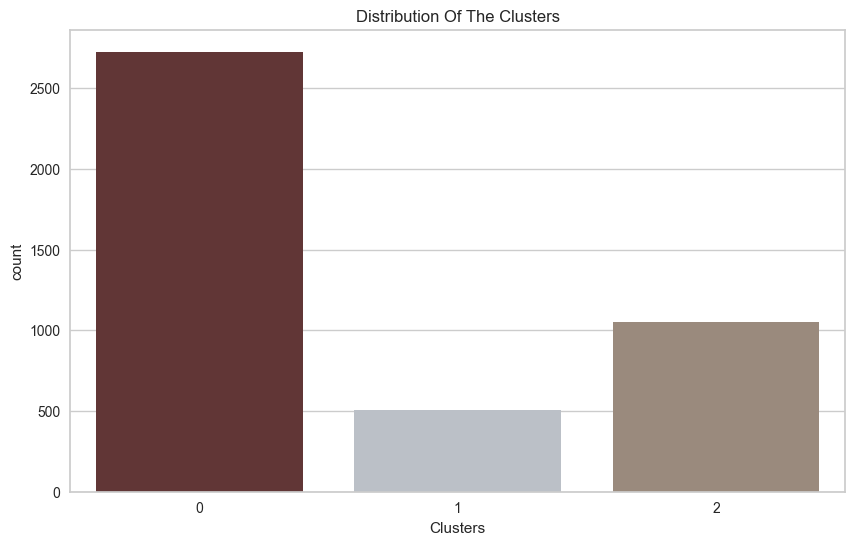

In [68]:
count_plot(grouped_df, "Clusters")

In [45]:
df=grouped_df.loc[grouped_df['Clusters'] == 0, 'CustomerID']
df.dtype

dtype('float64')

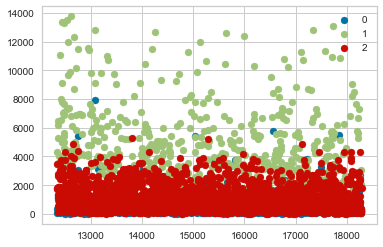

In [46]:
u_labels = np.unique(grouped_df['Clusters'])

for i in u_labels:
    df1=grouped_df.loc[grouped_df['Clusters'] == i, 'CustomerID']
    df2=grouped_df.loc[grouped_df['Clusters'] == i, 'monetary_value']
    plt.scatter(df1 , df2 , label = i)
plt.legend()
plt.show()

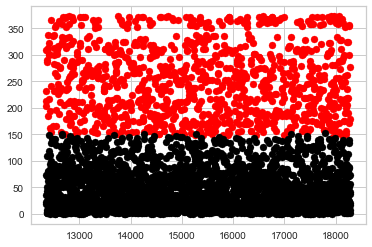

In [50]:
df1=grouped_df.loc[grouped_df['Clusters'] == 0, 'CustomerID']
df2=grouped_df.loc[grouped_df['Clusters'] == 0, 'recency']
df3=grouped_df.loc[grouped_df['Clusters'] == 2, 'recency']
df4=grouped_df.loc[grouped_df['Clusters'] == 2, 'CustomerID']
#Plotting the results 
plt.scatter(df1 , df2 , color = 'red')
plt.scatter(df4 , df3 , color = 'black')
plt.show()

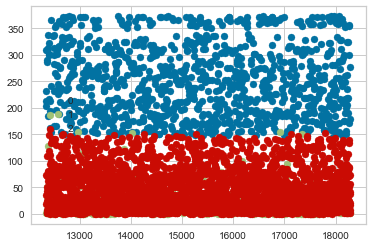

In [47]:
u_labels = np.unique(grouped_df['Clusters'])

for i in u_labels:
    df1=grouped_df.loc[grouped_df['Clusters'] == i, 'CustomerID']
    df2=grouped_df.loc[grouped_df['Clusters'] == i, 'recency']
    plt.scatter(df1 , df2 , label = i)
plt.legend()
plt.show()

In [3]:
abs

'c:\\Users\\abulf\\Documents\\Python_tutorial\\Assignments\\Machine_learning\\ML_framework'

In [53]:
pickle.dump(kmeans, open(abs + "\\output\\Clustering\\online_retail\\kmeans.pkl", 'wb'))
pickle.dump(normal_model, open(abs + "\\output\\Clustering\\online_retail\\normalize_model.pkl", 'wb'))

In [4]:
import datetime
current_time = datetime.datetime.now()
current_time = str(current_time)
lst = current_time.split(" ")
lst = lst[0]
lst = lst.split("-") 
res = [eval(i) for i in lst]

2022-5-30

In [5]:
date_input = input("Enter date in year-month-date format:")
lst1 = date_input.split("-")
res1 = [eval(i) for i in lst1]

In [6]:
monthDays = [31, 28, 31, 30, 31, 30,
             31, 31, 30, 31, 30, 31]
 
 
 
def countLeapYears(d):
 
    years = d[0]
    if (d[1] <= 2):
        years -= 1
    return int(years / 4) - int(years / 100) + int(years / 400)
 
def getDifference(dt1, dt2):
    n1 = dt1[0] * 365 + dt1[2]
    for i in range(0, dt1[1] - 1):
        n1 += monthDays[i]
    n1 += countLeapYears(dt1)
    n2 = dt2[0] * 365 + dt2[2]
    for i in range(0, dt2[1]- 1):
        n2 += monthDays[i]
    n2 += countLeapYears(dt2)
    return (n1 - n2)
 
recency = getDifference(res, res1)
recency

203

In [13]:
monetory = float(input("Enter amount"))
frequency = int(input("Enter counts"))
amount = frequency * monetory


In [7]:
model = pickle.load(open(abs + "\\output\\Clustering\\online_retail\\kmeans.pkl", 'rb'))
normalize_model = pickle.load(open(abs + "\\output\\Clustering\\online_retail\\normalize_model.pkl", 'rb'))

In [14]:
nor = []
nor.append(amount)
nor.append(frequency)
nor.append(recency)
nor = np.reshape(nor, (-1,3 ))
nor1 = normalize_model.transform(nor)

In [15]:
nor1

array([[0.14519447, 0.00529101, 0.54423592]])

In [16]:
cluster = model.predict(nor1)
cluster

array([0])